## **pyTopoComplexity (v0.7.3)**
### **Example for using `pycwtmexhat` module to perform mexican-hat 2-D continuous wavelet transform analysis** 

Two-dimensional continuous wavelet transform (2D-CWT) with a Mexican Hat wevalet has been applied to measure the topographic complexity (i.e., surface roughness) of a land surface. Such method quanitfy the wavelet-based curvature of the surface, which has been proposed to be a effective geomorphic metric for relative age dating of deep-seated landslide deposits, allowing a quick assessment of landslide freqency and spatiotemporal pattern over a large area.

The original MATLAB code was developed by Dr. Adam M. Booth (Portland State Univeristy) and used in Booth et al. (2009) and Booth et al. (2017). This MATLAB code was later revised and adapted by Dr. Sean R. LaHusen (Univeristy of Washington) and Dr. Erich N. Herzig (Univeristy of Washington) in their research (e.g., LaHusen et al., 2020; Herzig et al., 2023).

Since November 2023, Dr. Larry Syu-Heng Lai (Univeristy of Washington) translated the code into a open-source Python version with continous optimizations. The current codes have the capability to automoatically detect the grid spacing ($\Delta$) and the unit of XYZ direction of the input Digital Elevation Model (DEM) raster and compute the 2D-CWT results with the adequate wavelet scale factor ($s$) at an designated Mexican Hat wavelet ($\lambda$).

The example GeoTIFF rasters include the LiDAR Digital Elevation Model (DEM) files that cover the area and nearby region of a deep-seated landslide occurred in 2014 at Oso area of the North Fork Stillaguamish River (NFSR) valley, Washington State, USA (Washington Geological Survey, 2023). The example DEMs have various grid size, coordinate reference system (CRS), and unit of grid value (elevation, Z). 

To use this code, please cite the Zenodo repository that hosts the latest release of this code: 
* Lai, L. S.-H. (2024). pyTopoComplexity. Zenodo. https://doi.org/10.5281/zenodo.11239338
* Github repository: https://github.com/GeoLarryLai/pyTopoComlexity
<hr>

### **Theory** (Booth et al., 2009; Torrence and Compo, 1998)

The 2D-CWT provides information regarding how amplitude is distributed over spatial frequency at each position in the data by transforming spatial data into position-frequency space. The 2D-CWT is calculated by a convolution of the elevation $z$ and a wavelet family $\psi$, with a wavelet scale parameter $s$ at every location ($x$, $y$):
$$
C (s, x, y) = \Delta^2 \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} z(x, y) \psi \left( x, y \right) dx \, dy
$$

, where the wavelet coefficient $C(s,x,y)$ provides a measure of how well the wavelet $\psi$ matches the data $z$ at each node/grid. When $s$ is large, $\psi$ is spread out and takes into account long wavelength features of $z$; when $s$ is small, $\psi$ is more localized in space and sensitive to fine-scale features of $z$. 

Here we use 2D Mexican hat wavelet function to describe $\psi$:

$$
\psi = − \frac{1}{\pi(s\Delta)^4}(1-\frac{𝑥^2+𝑦^2}{2s^2})e^{(-\frac{𝑥^2+𝑦^2}{2s^2})}
\:\:\:\:\:\:\:\:\:
\lambda=\frac{2\pi s}{\sqrt{5/2}}\Delta
$$

The Mexican hat is proportional to the second derivative of a Gaussian envelope, and it has a wavelength ($\lambda$) which is dependent on the grid spacing ($\Delta$) of the input raster. The $\psi$ here has been scaled to the wavelet scale parameter $s$ and the grid spacing $\Delta$ so that the wavelet coefficient $C$ is equal to curvature. 
<hr>

### **References**
##### Journal Articles: 
* Booth, A.M., LaHusen, S.R., Duvall, A.R., Montgomery, D.R., 2017. Holocene history of deep-seated landsliding in the North Fork Stillaguamish River valley from surface roughness analysis, radiocarbon dating, and numerical landscape evolution modeling. Journal of Geophysical Research: Earth Surface 122, 456-472. https://doi.org/10.1002/2016JF003934 
* Booth, A.M., Roering, J.J., Perron, J.T., 2009. Automated landslide mapping using spectral analysis and high-resolution topographic data: Puget Sound lowlands, Washington, and Portland Hills, Oregon. Geomorphology 109, 132-147. https://doi.org/10.1016/j.geomorph.2009.02.027   
* Herzig, E.N., Duvall, A.R., Booth, A.R., Stone, I., Wirth, E., LaHusen, S.R., Wartman, J., Grant, A., 2023. Evidence of Seattle Fault Earthquakes from Patterns in Deep‐Seated Landslides. Bulletin of the Seismological Society of America. https://doi.org/10.1785/0120230079 
* LaHusen, S.R., Duvall, A.R., Booth, A.M., Grant, A., Mishkin, B.A., Montgomery, D.R., Struble, W., Roering, J.J., Wartman, J., 2020. Rainfall triggers more deep-seated landslides than Cascadia earthquakes in the Oregon Coast Range, USA. Science Advances 6, eaba6790. https://doi.org/10.1126/sciadv.aba6790  
* Torrence, C., Compo, G.P., 1998. A practical guide to wavelet analysis. Bulletin of the American Meteorological Society 79 (1), 61–78.

##### Digital Elevation Model (DEM) Examples:
* Washington Geological Survey, 2023. 'Stillaguamish 2014' and 'Snohoco Hazel 2006' projects [lidar data]: originally contracted by Washington State Department of Transportation (WSDOT). [accessed April 4, 2024, at http://lidarportal.dnr.wa.gov]
<hr>

#### 1. Import raster

In [11]:
import os

base_dir = os.getcwd()  #Change the directory of base folder as needed
base_dir = os.path.join(base_dir, 'ExampleDEM')

input_file = 'Ososlid2014_f_3ftgrid.tif'
input_dir = os.path.join(base_dir, input_file)

#### 2. Run 2D-CWT analysis with `pycwtmexhat`

User must specify a desired value for the Mexican Hat Fourier wavelet $\lambda$ (in meters) in order to calculate grid spacing $\Delta$ and wavelet scale $s$ for analysis.

The module can use two modules from the **numpy** packages to conduct 2D-CWT convolution, either the conventional way of is using <code>convolve2d</code> module, or through a much faster way - Fast Fourier Transform (FFT) method - using <code>fftconvolve</code> module. Users can choose the method by setting the parameter `conv_method = 'conv'` or `conv_method = 'fft'` respectively (the default is set to `'fft'`).

Users may also choose to turn on or off the chunk-processing optimization through the parameter `chunk_processing=True` or `chunk_processing=False`. When chunk-processing is on, user can specify the desired chunk size to optimize the performance on your local machine. The default is set to turn on the chunk-processing with the `chunksize=(512,512)` to mitigate the RAM outage issues when handling a large raster file. Users can choose a smaller <code>chunksize</code> for never loading the entire DEM into memory, alleviating the RAM issues when handling large GeoTIFF files with relatively limited memory. However, the performance could be impacted (required much more processing time) due to the overhead of reading and writing in chunks.

***Notes:***
If the input DEM raster include grids that contain uncommonly/errorenously created no-data values, the <code>fftconvolve</code> package used in the <code>conv2_mexh</code> function will return empty result in that chunk with an error message *"RuntimeWarning: invalid value encountered in multiply ret = ifft(sp1 * sp2, fshape, axes=axes)"*. The function will still proceed to process the rest of the chunks, resulting a raster with empty squares. In this case, users may switch to the conventional <code>convolve2d</code> convolution package in the <code>conv2_mexh</code>, which will significantlly increase the processing time.

In [12]:
from pytopocomplexity import pycwtmexhat

# Create pycwtmexhat instance
cwt = pycwtmexhat(conv_method='fft', chunk_processing=True, chunksize=(512,512))

# Define Lambda
Lambda = 15

# Run the analysis with pycwtmexhat module
Z, result, meta = cwt.analyze(input_dir, Lambda)

[########################################] | 100% Completed | 536.10 ms


#### 3. Export results

In [13]:
# Generate output file name
output_file = os.path.splitext(input_file)[0] + f'_pyCWTMexHat({Lambda}m).tif'
output_dir = os.path.join(base_dir, output_file)

# Export results using pycwtmexhat module
cwt.export_result(result, meta, output_dir)

Processed result saved to Ososlid2014_f_3ftgrid_pyCWTMexHat(15m).tif


#### 4. Display results

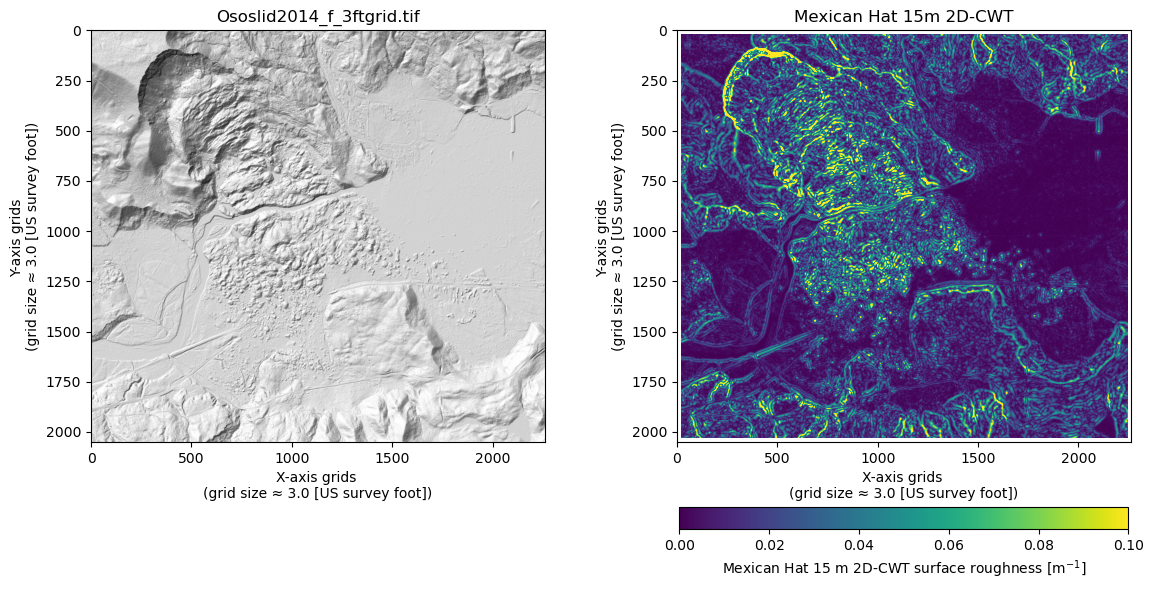

In [14]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

# Get CRS information for plotting
with rasterio.open(input_dir) as src:
    transform = src.transform
    crs = src.crs

# Plot results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the hillshade
ls = LightSource(azdeg=315, altdeg=45)
hs = axes[0].imshow(ls.hillshade(Z, vert_exag=2), cmap='gray')
axes[0].set_title(input_file)
axes[0].set_xlabel(f'X-axis grids \n(grid size ≈ {round(transform[0],4)} [{crs.linear_units}])')
axes[0].set_ylabel(f'Y-axis grids \n(grid size ≈ {-round(transform[4],4)} [{crs.linear_units}])')
cbar1 = fig.colorbar(hs, ax=axes[0], orientation='horizontal', fraction=0.045, pad=0.13)
cbar1.ax.set_visible(False)

# Plot the 2D-CWT roughness
im = axes[1].imshow(result, cmap='viridis')
im.set_clim(0, round(np.nanpercentile(result, 99), 2))
axes[1].set_title(f'Mexican Hat {Lambda}m 2D-CWT')
axes[1].set_xlabel(f'X-axis grids \n(grid size ≈ {round(transform[0],4)} [{crs.linear_units}])')
axes[1].set_ylabel(f'Y-axis grids \n(grid size ≈ {-round(transform[4],4)} [{crs.linear_units}])')
cbar2 = fig.colorbar(im, ax=axes[1], orientation='horizontal', fraction=0.045, pad=0.13)
cbar2.set_label(f'Mexican Hat {Lambda} m 2D-CWT surface roughness [m$^{{-1}}$]')

plt.tight_layout()
plt.savefig('pycwtmexhat.png', dpi=200, bbox_inches='tight')
plt.show()